# 03 Analysis of histone dynamics

## 1. Imports

In [40]:
import numpy as np
import pandas as pd
import pickle as pkl

## 2. Load data

In [2]:
mRNA_file = "../data/FISH_RNAseq_combined_FACS_phases_7_genes_new_CC_phases.xlsx"

Relative mRNAs (Lotte's RNAseq data, normalized at each time point):

In [3]:
mRNA_rel = pd.read_excel(mRNA_file, sheet_name="nostress_WT_R1_normalized", skiprows=1, usecols='A, D:P')

In [4]:
mRNA_abs = pd.read_excel(mRNA_file, sheet_name="nostress_WT_R1_absolute", skiprows=1, usecols='A, D:P', skipfooter=2)
mRNA_abs.rename(columns={"ORF (Yoav))": "systematic"}, inplace=True)

Get systematic names from another sheet:

In [5]:
systematic_names = pd.read_excel(mRNA_file, sheet_name="nostress_WT_R1_absolute", skiprows=1, usecols='A', skipfooter=2)
systematic_names.rename(columns={"ORF (Yoav))": "systematic"}, inplace=True)

In [6]:
mRNA_rel['systematic'] = systematic_names['systematic']

In [7]:
mRNA_rel.head()

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60,systematic
0,TFC3,0.000013,0.000054,0.000032,0.000024,0.000029,0.000031,0.000026,0.000012,0.000030,0.000025,0.000017,0.000035,0.000036,YAL001C
1,VPS8,0.000042,0.000005,0.000025,0.000024,0.000021,0.000025,0.000030,0.000037,0.000023,0.000025,0.000022,0.000020,0.000027,YAL002W
2,EFB1,0.001254,0.000999,0.001135,0.001217,0.001211,0.001374,0.001378,0.001432,0.000990,0.001696,0.001355,0.001418,0.001401,YAL003W
3,YAL004W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,YAL004W
4,SSA1,0.001864,0.001696,0.001471,0.001117,0.001181,0.001143,0.001278,0.001357,0.001487,0.001231,0.001527,0.001430,0.001339,YAL005C


In [8]:
mRNA_abs.head()

,systematic,0,5,10,15,20,25,30,35,40,45,50,55,60
0,YAL001C,0.526949,2.276053,2.298537,1.733389,2.124754,0.842702,0.703381,0.342122,0.830454,0.687500,0.291892,1.119403,0.800000
1,YAL002W,1.756497,0.189671,1.838829,1.733389,1.517681,0.674162,0.820611,1.026366,0.622840,0.687500,0.364865,0.639659,0.600000
2,YAL003W,52.870571,42.106982,82.747326,88.749521,88.329043,37.753063,37.865344,39.344041,27.197361,46.578125,22.840541,45.735608,31.400000
3,YAL004W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,YAL005C,78.557958,71.470595,107.242894,81.420235,86.122006,31.411921,35.095267,37.285130,40.861433,33.826346,25.749620,46.123292,30.008541


In [9]:
histones = {'HHF1': 'YBR009C', 'HHF2': 'YNL030W', 
            'HHT1': 'YBR010W', 'HHT2': 'YNL031C', 
            'HTB1': 'YDR224C', 'HTB2': 'YBL002W', 
            'HTA1': 'YDR225W', 'HTA2': 'YBL003C'}

In [10]:
histones_systematic = list(histones.values())

## 3. Histone mRNAs

### 3.1 Relative amount of mRNAs (RNAseq data)

In [11]:
histones_rel_df = mRNA_rel[mRNA_rel["systematic"].isin(histones_systematic)]

In [12]:
non_histones_rel_df = mRNA_rel[~mRNA_rel["systematic"].isin(histones_systematic)]

In [13]:
histones_rel_df

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60,systematic
101,HTB2,0.000158,0.000279,0.000637,0.001382,0.001824,0.001552,0.001028,0.000610,0.000453,0.000261,0.000234,0.000174,0.000192,YBL002W
102,HTA2,0.000138,0.000145,0.000407,0.000726,0.001349,0.001278,0.000970,0.000633,0.000461,0.000206,0.000160,0.000124,0.000113,YBL003C
220,HHF1,0.000149,0.000078,0.000242,0.001312,0.002513,0.002079,0.001243,0.000647,0.000293,0.000223,0.000137,0.000183,0.000150,YBR009C
221,HHT1,0.000142,0.000147,0.000280,0.000988,0.001667,0.001113,0.000551,0.000321,0.000160,0.000115,0.000131,0.000093,0.000090,YBR010W
1145,HTB1,0.000258,0.000356,0.000422,0.000977,0.001544,0.000926,0.000653,0.000386,0.000287,0.000140,0.000143,0.000169,0.000138,YDR224C
1146,HTA1,0.000379,0.000530,0.001024,0.002522,0.003463,0.002562,0.001360,0.000683,0.000514,0.000288,0.000225,0.000228,0.000284,YDR225W
4635,HHF2,0.000439,0.000498,0.001183,0.001827,0.002537,0.002087,0.001112,0.000632,0.000530,0.000322,0.000357,0.000254,0.000439,YNL030W
4636,HHT2,0.000529,0.000839,0.001303,0.002312,0.002825,0.003182,0.001936,0.001107,0.000732,0.000410,0.000519,0.000493,0.000601,YNL031C


Drop rows with only zeros (only relevant for non-histones):

In [14]:
non_histones_rel_df = non_histones_rel_df.loc[~(non_histones_rel_df[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]]==0).all(axis=1)]

In [15]:
non_histones_rel_df

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60,systematic
0,TFC3,0.000013,0.000054,0.000032,0.000024,0.000029,0.000031,0.000026,0.000012,0.000030,0.000025,0.000017,0.000035,0.000036,YAL001C
1,VPS8,0.000042,0.000005,0.000025,0.000024,0.000021,0.000025,0.000030,0.000037,0.000023,0.000025,0.000022,0.000020,0.000027,YAL002W
2,EFB1,0.001254,0.000999,0.001135,0.001217,0.001211,0.001374,0.001378,0.001432,0.000990,0.001696,0.001355,0.001418,0.001401,YAL003W
4,SSA1,0.001864,0.001696,0.001471,0.001117,0.001181,0.001143,0.001278,0.001357,0.001487,0.001231,0.001527,0.001430,0.001339,YAL005C
5,ERP2,0.000058,0.000063,0.000145,0.000119,0.000112,0.000104,0.000115,0.000108,0.000076,0.000050,0.000052,0.000079,0.000040,YAL007C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,YIR018C-A,0.000023,0.000036,0.000016,0.000012,0.000008,0.000031,0.000015,0.000012,0.000008,0.000022,0.000013,0.000010,0.000036,YIR018C-A
6697,YIR021W-A,0.000000,0.000014,0.000000,0.000014,0.000025,0.000006,0.000004,0.000021,0.000008,0.000006,0.000013,0.000015,0.000013,YIR021W-A
6698,YIR023C-A,0.000004,0.000005,0.000006,0.000005,0.000000,0.000006,0.000000,0.000000,0.000000,0.000006,0.000000,0.000005,0.000004,YIR023C-A
6699,YIR030W-A,0.000004,0.000005,0.000019,0.000000,0.000004,0.000000,0.000000,0.000000,0.000008,0.000000,0.000004,0.000005,0.000004,YIR030W-A


C:\Users\mjs\AppData\Local\Temp/ipykernel_10016/4110148597.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax = histones_rel_df.mean().plot(logy=False)
C:\Users\mjs\AppData\Local\Temp/ipykernel_10016/4110148597.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_histones_rel_df.mean().plot(logy=False)


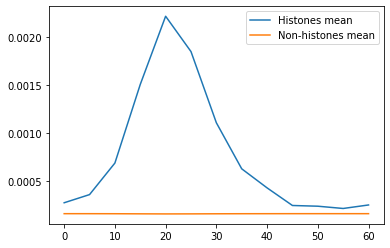

In [16]:
ax = histones_rel_df.mean().plot(logy=False)
non_histones_rel_df.mean().plot(logy=False)
ax.legend(["Histones mean", "Non-histones mean"])

In the time-resolved TRSL model, 20 minutes is exactly at the transition from late G1 to S phase.

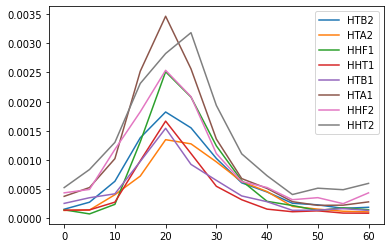

In [17]:
ax = histones_rel_df[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]].T.plot(logy=False)
ax.legend(histones_rel_df['Gene'])

### 3.2 Absolute amount of mRNAs

In [20]:
histones_abs_df = mRNA_abs[mRNA_abs["systematic"].isin(histones_systematic)]

In [21]:
non_histones_abs_df = mRNA_abs[~mRNA_abs["systematic"].isin(histones_systematic)]

In [22]:
histones_abs_df

,systematic,0,5,10,15,20,25,30,35,40,45,50,55,60
101,YBL002W,6.674690,11.759607,46.430444,100.739551,132.974008,42.640736,28.252470,16.763983,12.456806,7.157933,3.940541,5.597015,4.300000
102,YBL003C,5.796441,6.110926,29.684540,52.928350,98.383089,35.112596,26.640502,17.389055,12.653154,5.671875,2.700000,3.997868,2.528889
220,YBR009C,6.264841,3.297211,17.649393,95.626349,183.184565,57.117914,34.159568,17.765444,8.058561,6.114512,2.307770,5.889033,3.365517
221,YBR010W,5.985431,6.184851,20.391960,72.004529,121.570597,30.562733,15.149196,8.822054,4.398265,3.171503,2.204170,2.983236,2.027097
1145,YDR224C,10.890284,14.984016,30.800394,71.212646,112.586803,25.449609,17.936216,10.605785,7.889311,3.842067,2.408108,5.437100,3.100000
1146,YDR225W,15.984126,22.339737,74.669032,183.852600,252.504794,70.393732,37.367170,18.761847,14.128980,7.906250,3.794595,7.356077,6.371111
4635,YNL030W,18.501772,20.980688,86.244472,133.181011,185.004883,57.321058,30.551484,17.359092,14.571304,8.838613,6.011149,8.183462,9.834483
4636,YNL031C,22.294176,35.353118,94.994589,168.589877,205.944997,87.415589,53.195992,30.407946,20.100121,11.265997,8.741776,15.886700,13.472903


Drop rows with only zeros (only relevant for non-histones):

In [23]:
non_histones_abs_df = non_histones_abs_df.loc[~(non_histones_abs_df[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]]==0).all(axis=1)]

In [24]:
non_histones_abs_df

,systematic,0,5,10,15,20,25,30,35,40,45,50,55,60
0,YAL001C,0.526949,2.276053,2.298537,1.733389,2.124754,0.842702,0.703381,0.342122,0.830454,0.687500,0.291892,1.119403,0.800000
1,YAL002W,1.756497,0.189671,1.838829,1.733389,1.517681,0.674162,0.820611,1.026366,0.622840,0.687500,0.364865,0.639659,0.600000
2,YAL003W,52.870571,42.106982,82.747326,88.749521,88.329043,37.753063,37.865344,39.344041,27.197361,46.578125,22.840541,45.735608,31.400000
4,YAL005C,78.557958,71.470595,107.242894,81.420235,86.122006,31.411921,35.095267,37.285130,40.861433,33.826346,25.749620,46.123292,30.008541
5,YAL007C,2.459096,2.655395,10.573269,8.666945,8.195478,2.865188,3.165215,2.965058,2.076134,1.375000,0.875676,2.558635,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,YIR018C-A,0.966074,1.517369,1.149268,0.866695,0.607072,0.842702,0.410306,0.342122,0.207613,0.601562,0.218919,0.319829,0.800000
6697,YIR021W-A,0.000000,0.569013,0.000000,1.040033,1.821217,0.168540,0.117230,0.570203,0.207613,0.171875,0.218919,0.479744,0.300000
6698,YIR023C-A,0.175650,0.189671,0.459707,0.346678,0.000000,0.168540,0.000000,0.000000,0.000000,0.171875,0.000000,0.159915,0.100000
6699,YIR030W-A,0.175650,0.189671,1.379122,0.000000,0.303536,0.000000,0.000000,0.000000,0.207613,0.000000,0.072973,0.159915,0.100000


C:\Users\mjs\AppData\Local\Temp/ipykernel_10016/1825380761.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax = histones_abs_df.mean().plot(logy=False)
C:\Users\mjs\AppData\Local\Temp/ipykernel_10016/1825380761.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_histones_abs_df.mean().plot(logy=False)


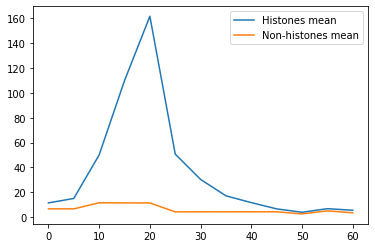

In [25]:
ax = histones_abs_df.mean().plot(logy=False)
non_histones_abs_df.mean().plot(logy=False)
ax.legend(["Histones mean", "Non-histones mean"])

In the time-resolved TRSL model, 20 minutes is exactly at the transition from late G1 to S phase.

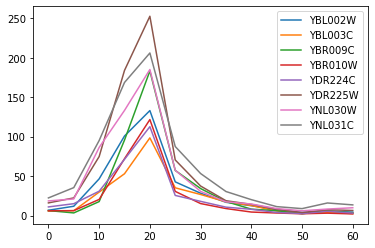

In [27]:
ax = histones_abs_df[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]].T.plot(logy=False)
ax.legend(histones_abs_df['systematic'])

## 4. Histone proteins

In [35]:
time_tes = pd.read_pickle("../parameters/te_time-resolved.p") # pkl.load(open("../../parameters/te_time-resolved.p"))

In [36]:
time_tes

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
YAL001C,0.013333,0.012500,0.008333,0.008333,0.005833,0.010000,0.015000,NaN,0.013333,0.010000,NaN,0.013333
YAL002W,0.006667,NaN,0.004167,0.002500,0.004167,0.006667,0.006667,0.008333,0.008333,0.005000,NaN,0.005000
YAL003W,0.070409,0.069484,0.054498,0.054663,0.054792,0.085746,0.083640,0.085128,0.082963,0.083191,0.105942,0.074928
YAL005C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL007C,0.029167,0.018333,0.017727,0.021481,0.017708,0.034444,0.023889,0.038333,0.032500,0.031667,0.041667,0.035556
...,...,...,...,...,...,...,...,...,...,...,...,...
YPR194C,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YPR196W,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YPR198W,NaN,0.018333,0.015833,0.008333,0.013333,0.023333,0.015000,0.021667,0.015000,0.015000,NaN,0.018333
YPR199C,0.001667,0.008333,NaN,0.005000,0.003333,0.015000,0.011667,NaN,0.010000,0.005000,NaN,0.012500


Drop rows with only zeros:

In [43]:
time_tes = time_tes[~time_tes.isin([0, np.nan]).all(axis=1)]

In [44]:
time_tes

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
YAL001C,0.013333,0.012500,0.008333,0.008333,0.005833,0.010000,0.015000,NaN,0.013333,0.010000,NaN,0.013333
YAL002W,0.006667,NaN,0.004167,0.002500,0.004167,0.006667,0.006667,0.008333,0.008333,0.005000,NaN,0.005000
YAL003W,0.070409,0.069484,0.054498,0.054663,0.054792,0.085746,0.083640,0.085128,0.082963,0.083191,0.105942,0.074928
YAL007C,0.029167,0.018333,0.017727,0.021481,0.017708,0.034444,0.023889,0.038333,0.032500,0.031667,0.041667,0.035556
YAL008W,0.033333,0.043333,0.026389,0.034000,0.023889,0.047500,0.041667,0.058333,0.048333,0.048333,0.051667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
YPR189W,0.011667,0.018333,0.013333,0.011250,0.009167,0.023333,0.021667,0.021667,0.017500,0.025000,0.028333,0.016667
YPR190C,0.016111,0.014167,0.015417,0.011667,0.011250,0.026667,0.025000,0.015000,0.023333,0.014167,0.018333,0.014167
YPR191W,0.026667,0.027500,0.018333,0.013333,0.016111,0.018333,0.035000,0.030000,0.025000,0.026667,0.040000,0.025000
YPR198W,NaN,0.018333,0.015833,0.008333,0.013333,0.023333,0.015000,0.021667,0.015000,0.015000,NaN,0.018333


In [45]:
time_tes_histones = time_tes[time_tes.index.isin(histones_systematic)]
time_tes_non_histones = time_tes[~time_tes.index.isin(histones_systematic)]

In [46]:
time_tes_histones

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
YBL002W,0.066667,0.065417,0.052283,0.051551,0.052857,0.080698,0.079048,0.081078,0.077778,0.081429,0.103750,0.075556
YDR224C,0.088333,0.092222,0.072688,0.072817,0.073938,0.110067,0.111204,0.106818,0.109583,0.102083,0.138333,0.100333


In [47]:
time_tes_non_histones

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
YAL001C,0.013333,0.012500,0.008333,0.008333,0.005833,0.010000,0.015000,NaN,0.013333,0.010000,NaN,0.013333
YAL002W,0.006667,NaN,0.004167,0.002500,0.004167,0.006667,0.006667,0.008333,0.008333,0.005000,NaN,0.005000
YAL003W,0.070409,0.069484,0.054498,0.054663,0.054792,0.085746,0.083640,0.085128,0.082963,0.083191,0.105942,0.074928
YAL007C,0.029167,0.018333,0.017727,0.021481,0.017708,0.034444,0.023889,0.038333,0.032500,0.031667,0.041667,0.035556
YAL008W,0.033333,0.043333,0.026389,0.034000,0.023889,0.047500,0.041667,0.058333,0.048333,0.048333,0.051667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
YPR189W,0.011667,0.018333,0.013333,0.011250,0.009167,0.023333,0.021667,0.021667,0.017500,0.025000,0.028333,0.016667
YPR190C,0.016111,0.014167,0.015417,0.011667,0.011250,0.026667,0.025000,0.015000,0.023333,0.014167,0.018333,0.014167
YPR191W,0.026667,0.027500,0.018333,0.013333,0.016111,0.018333,0.035000,0.030000,0.025000,0.026667,0.040000,0.025000
YPR198W,NaN,0.018333,0.015833,0.008333,0.013333,0.023333,0.015000,0.021667,0.015000,0.015000,NaN,0.018333


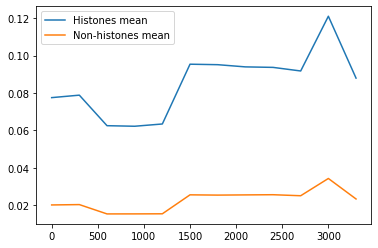

In [48]:
ax = time_tes_histones.mean().plot(logy=False)
time_tes_non_histones.mean().plot(logy=False)
ax.legend(["Histones mean", "Non-histones mean"])